### Machine Learning Project -- Wendy

For this project, I will be exploring publicly available data from Lending Club. It connects people who need money (borrowers) with people who have money (investors). As an investor, we would want to invest in people who showed a profile of having a high probability of paying us back. Therefore, binary models will be constructed to help predict this.

I will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. The data is downloaded from the following like: https://www.lendingclub.com/info/download-data.action.

The dependent 13 features are listed as follows:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

**Import the usual libraries for pandas and plotting.**

In [116]:
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn import cross_validation
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from collections import OrderedDict
from sklearn.svm import SVC
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.grid_search import GridSearchCV
from sklearn import neighbors
from sklearn import tree
import seaborn as sns
import matplotlib.pylab as plt
import random
random.seed(123)
%matplotlib inline

### Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [8]:
loans = pd.read_csv('loan_data.csv')

In [9]:
loans.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [11]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [12]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [155]:
loans["not.fully.paid"].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

### Exploratory Data Analysis

** Create a histogram of two FICO distributions on top of each other, one for each credit.policy outcome.**

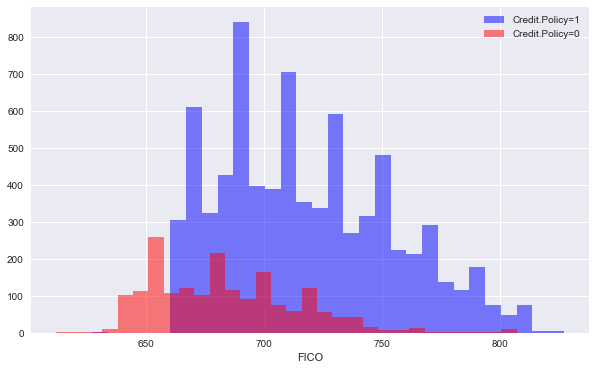

In [6]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

** Create a similar figure, except this time select by the not.fully.paid column.**

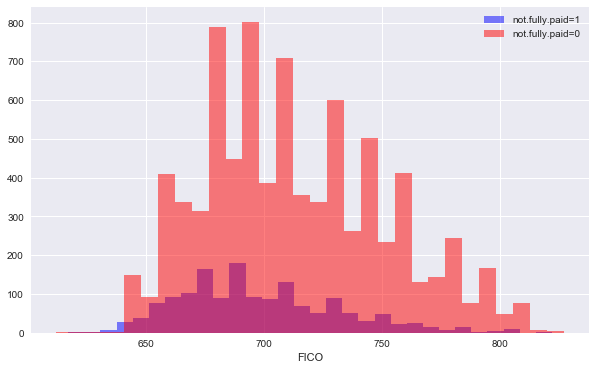

In [7]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',
                                              bins=30,label='not.fully.paid=1')
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',
                                              bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

** Create a countplot using seaborn showing the counts of loans by purpose, with the color hue defined by not.fully.paid. **

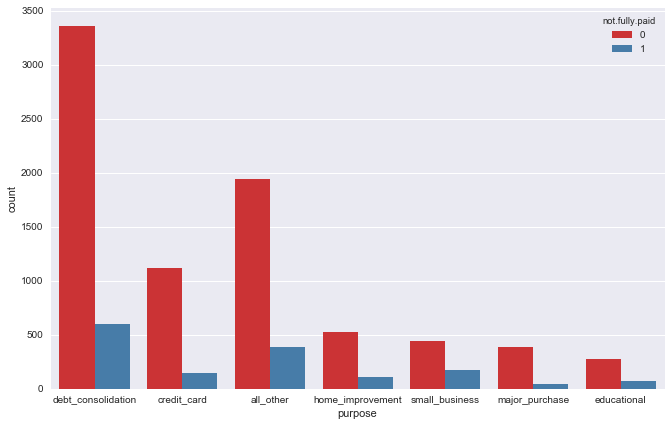

In [8]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loans,palette='Set1')

** The trend between FICO score and interest rate.**

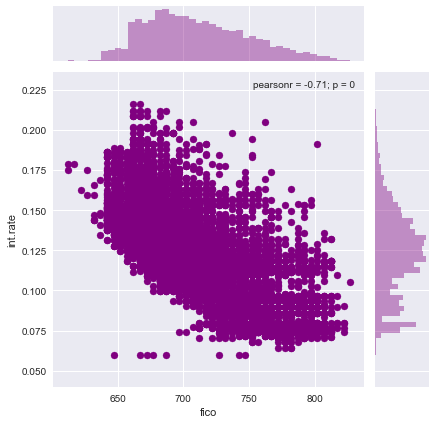

In [9]:
sns.jointplot(x='fico',y='int.rate',data=loans,color='purple')

** Check if the trend differed between not.fully.paid and credit.policy.**

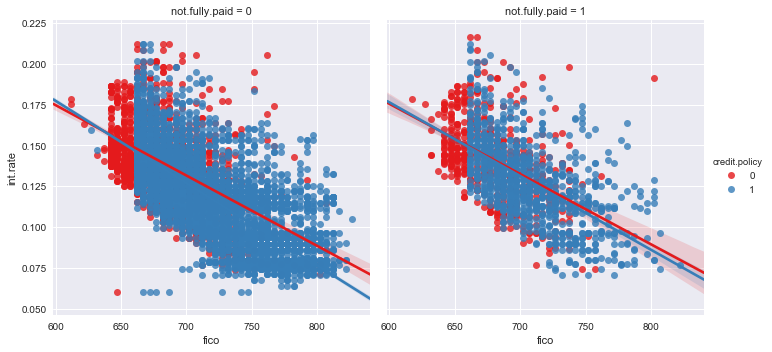

In [10]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

### Setting up the Data

In [13]:
cat_feats = ['purpose']

**Create dummy variables for purpose**

In [14]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [118]:
final_data.info()
final_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
credit.policy                 9578 non-null int64
int.rate                      9578 non-null float64
installment                   9578 non-null float64
log.annual.inc                9578 non-null float64
dti                           9578 non-null float64
fico                          9578 non-null int64
days.with.cr.line             9578 non-null float64
revol.bal                     9578 non-null int64
revol.util                    9578 non-null float64
inq.last.6mths                9578 non-null int64
delinq.2yrs                   9578 non-null int64
pub.rec                       9578 non-null int64
not.fully.paid                9578 non-null int64
purpose_credit_card           9578 non-null uint8
purpose_debt_consolidation    9578 non-null uint8
purpose_educational           9578 non-null uint8
purpose_home_improvement      9578 non-null uint8
purpose_major_purchase        9

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


#### Standardize data for further analysis

In [127]:
scale = final_data.iloc[:,:9]
non_scale = final_data.iloc[:,9:]
loans_scale = preprocessing.scale(scale)
loans_scale = pd.DataFrame(loans_scale,columns=scale.columns)
final_data = pd.concat([loans_scale,non_scale],axis=1)
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,0.492222,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,0,0,0,0,0,1,0,0,0,0
1,0.492222,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,0,0,0,0,1,0,0,0,0,0
2,0.492222,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,1,0,0,0,0,1,0,0,0,0
3,0.492222,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,1,0,0,0,0,1,0,0,0,0
4,0.492222,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,0,1,0,0,1,0,0,0,0,0


### Separate response and independent data

In [128]:
df_x = final_data.drop('not.fully.paid',axis=1)
df_y = final_data['not.fully.paid']
x_train,x_test,y_train,y_test=train_test_split(\
    df_x, df_y, test_size=0.3, random_state=42)

### Training a decision tree

In [129]:
# parameter tuning using 10 fold cross validation
param_grid = {"max_depth": np.arange(2,20,)}
dt = tree.DecisionTreeClassifier()
dt_cv = GridSearchCV(dt, param_grid, cv=10, n_jobs=8, refit=True, verbose=True)
dt_cv.fit(x_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done 144 tasks      | elapsed:    4.0s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    4.9s finished


GridSearchCV(cv=10, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
       fit_params={}, iid=True, n_jobs=8,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19])},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=True)

In [130]:
dt_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [131]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(x_train.columns)
features

['credit.policy',
 'int.rate',
 'installment',
 'log.annual.inc',
 'dti',
 'fico',
 'days.with.cr.line',
 'revol.bal',
 'revol.util',
 'inq.last.6mths',
 'delinq.2yrs',
 'pub.rec',
 'purpose_credit_card',
 'purpose_debt_consolidation',
 'purpose_educational',
 'purpose_home_improvement',
 'purpose_major_purchase',
 'purpose_small_business']

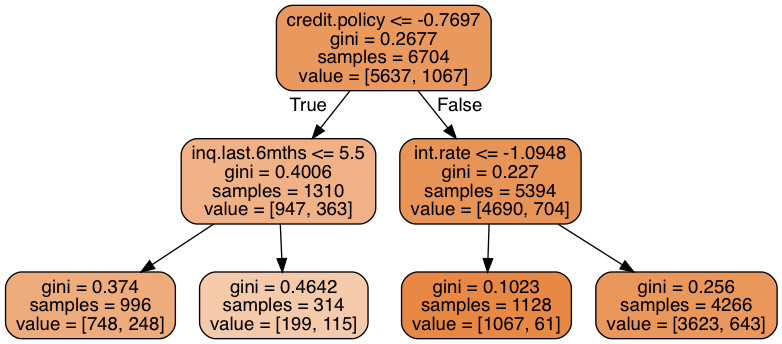

In [132]:
dot_data = StringIO()  
export_graphviz(dt_cv.best_estimator_, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

#### Create ROC curve and calculated average AUC score and standard deviation

Automatically created module for IPython interactive environment
Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    6.0s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done 120 tasks      | elapsed:    3.8s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    5.9s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    2.5s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    5.8s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    2.7s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    5.9s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    6.6s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    5.5s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done 136 tasks      | elapsed:    3.9s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    5.4s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done  88 tasks      | elapsed:    2.6s
[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    6.0s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    5.7s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=8)]: Done 180 out of 180 | elapsed:    6.2s finished


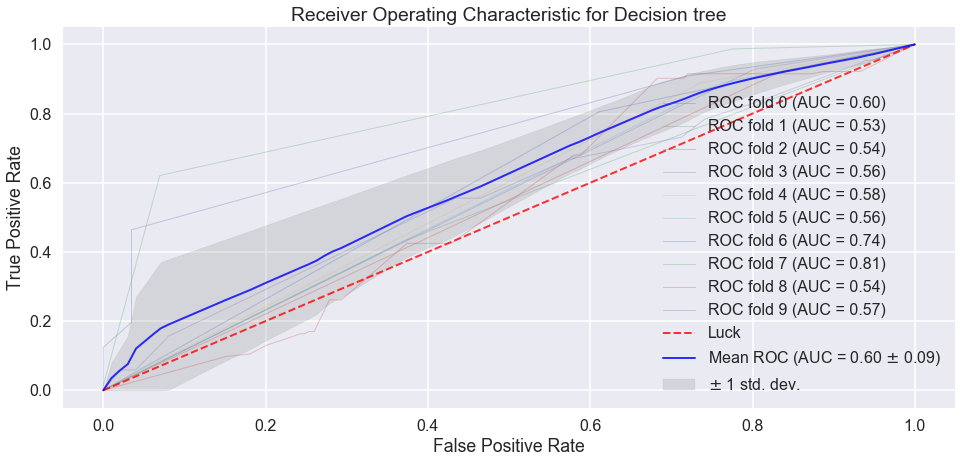

In [133]:
print(__doc__)

from scipy import interp
from itertools import cycle
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

X = df_x
y = df_y

n_samples, n_features = X.shape
plt.figure(figsize=(16, 7))

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = dt_cv

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision tree')
plt.legend(loc="lower right")
plt.show()

### Training the logistic regression model

Automatically created module for IPython interactive environment


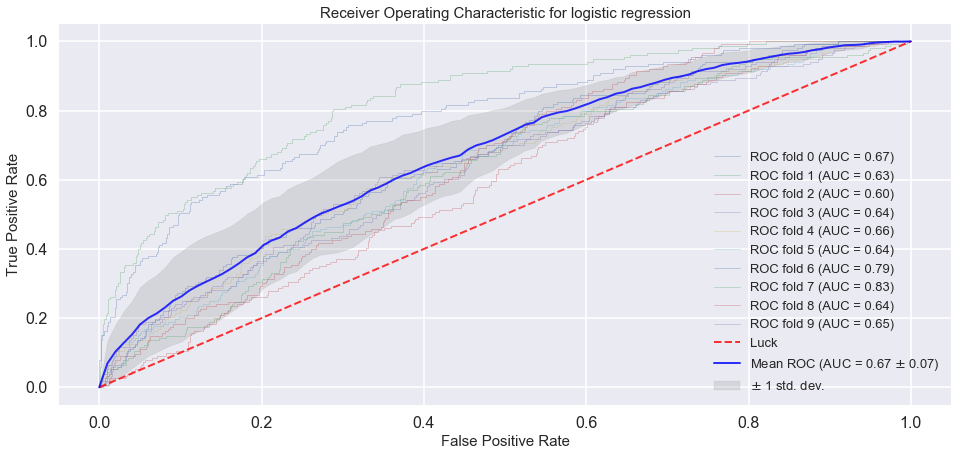

In [134]:
print(__doc__)

from scipy import interp
from itertools import cycle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

X = df_x
y = df_y

n_samples, n_features = X.shape
plt.figure(figsize=(16, 7))

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = LogisticRegression()

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic for logistic regression',fontsize=15)
plt.legend(loc="lower right",fontsize=13)
sns.set_context("poster")

In [135]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=101)
lr_preds = classifier.predict(x_test)
print classification_report(y_test,lr_preds)

             precision    recall  f1-score   support

          0       0.85      0.97      0.91      2431
          1       0.35      0.10      0.15       443

avg / total       0.78      0.83      0.79      2874



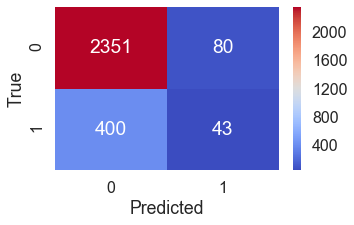

In [136]:
conf = pd.crosstab(index=y_test, columns=lr_preds, rownames=['True'], colnames=['Predicted'])
conf
plt.figure(figsize=(5, 3))
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')

### Training the Neural Network 

#### Parameter tuning using 10 fold cross validation with three different weight optimization methods: quasi-Newton methods, stochastic gradient descent and stochastic gradient-based optimizer.

#### Create ROC curve and calculated average AUC score and standard deviation

/Users/gaoweijie/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


Mean accuracy: [ 0.83942437  0.83994618  0.83785806]
Selected model index: 1
Complexity: sgd


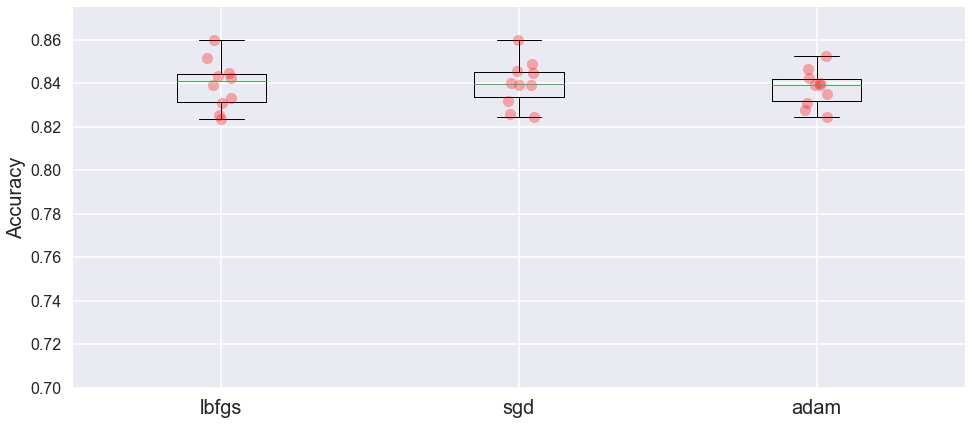

In [141]:
#Create a 10-fold cross validation set
kf=cross_validation.KFold(n=final_data.shape[0], n_folds=10, shuffle=True, random_state=0)
 
# activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}
#Search the parameter among the following
C=['lbfgs', 'sgd', 'adam']

acc = np.zeros((10,3))
i=0
for train_index, val_index in kf:
    X_train, X_val = df_x.iloc[train_index], df_x.iloc[val_index]
    y_train, y_val = df_y.iloc[train_index], df_y.iloc[val_index]
    j=0
    for c in C:
        nn = MLPClassifier(solver= c, alpha=1e-5,
                      hidden_layer_sizes=(5, 2), random_state=1)
        dt = nn.fit(X_train,y_train)
        yhat = dt.predict(X_val)
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j=j+1
    i=i+1

plt.figure(figsize=(16, 7))
plt.boxplot(acc);
for i in xrange(3):
    xderiv = (i+1)*np.ones(acc[:,i].shape)+(np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv,acc[:,i],'ro',alpha=0.3)

print 'Mean accuracy: ' + str(np.mean(acc,axis = 0))
print 'Selected model index: ' + str(np.argmax(np.mean(acc,axis = 0)))
print 'Complexity: ' + str(C[np.argmax(np.mean(acc,axis = 0))])

plt.ylim((0.7,0.875))
ax = plt.gca()
ax.set_xticklabels(['lbfgs', 'sgd', 'adam'],fontsize = 20)
plt.ylabel('Accuracy',fontsize=20)
sns.set_context("poster")

# plt.savefig("Neural_network.png",dpi=300, bbox_inches='tight')

Automatically created module for IPython interactive environment


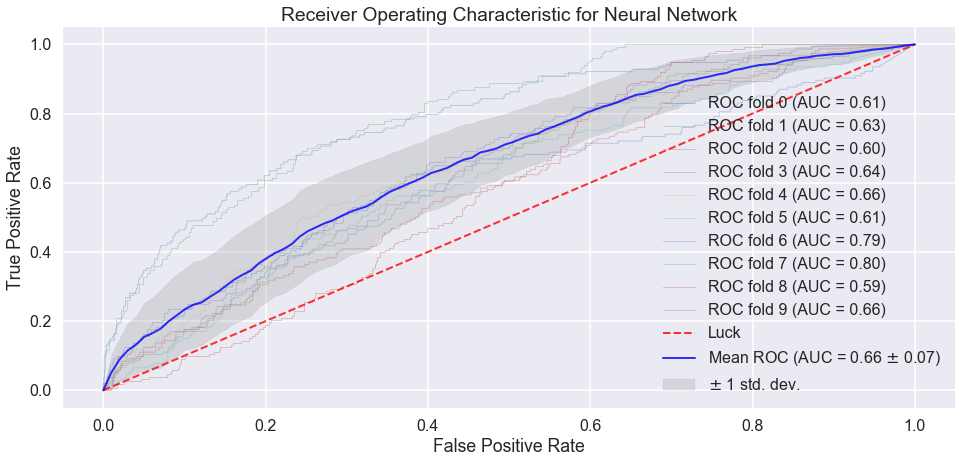

In [139]:
print(__doc__)

from scipy import interp
from itertools import cycle
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

X = df_x
y = df_y

n_samples, n_features = X.shape
plt.figure(figsize=(16, 7))

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=(5, 2), random_state=1)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Neural Network')
plt.legend(loc="lower right")
plt.show()

In [152]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=101)
classifier = MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=(5, 2), random_state=1)
classifier.fit(x_train,y_train)
nn_preds = classifier.predict(x_test)
print classification_report(y_test,nn_preds)

             precision    recall  f1-score   support

          0       0.85      1.00      0.92      2431
          1       0.43      0.02      0.04       443

avg / total       0.78      0.84      0.78      2874



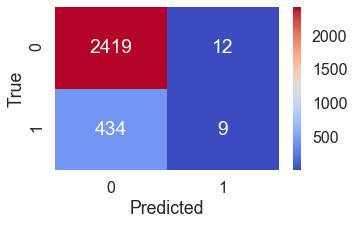

In [154]:
conf = pd.crosstab(index=y_test, columns=nn_preds, rownames=['True'], colnames=['Predicted'])
conf
plt.figure(figsize=(5, 3))
sns.heatmap(conf,cmap='coolwarm',annot=True,fmt='g')

### Training the Random Forest model

#### Parameter tunning uinsg 10 fold cross validation with different max_feature and number of trees

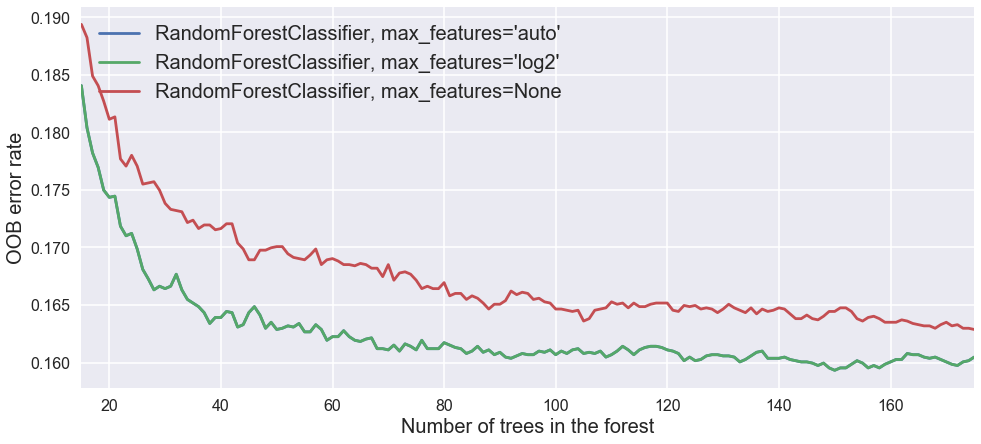

In [142]:
RANDOM_STATE = 123
ensemble_clfs = [
    ("RandomForestClassifier, max_features='auto'",
        RandomForestClassifier(warm_start=True, oob_score=True,
                               max_features="auto",
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features='log2'",
        RandomForestClassifier(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForestClassifier, max_features=None",
        RandomForestClassifier(warm_start=True, max_features=None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(df_x, df_y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))
        
plt.figure(figsize=(16, 7))
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("Number of trees in the forest",fontsize = 20)
plt.ylabel("OOB error rate",fontsize = 20)
plt.legend(loc="upper left",fontsize = 20)
sns.set_context("poster")

#### Create ROC curve and calculated average AUC score and standard deviation

Automatically created module for IPython interactive environment


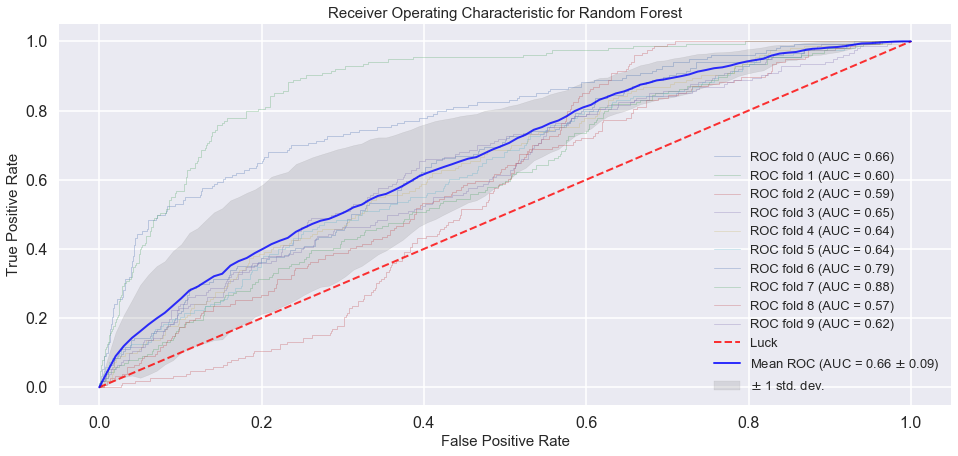

In [143]:
print(__doc__)

from scipy import interp
from itertools import cycle
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

X = df_x
y = df_y

n_samples, n_features = X.shape
plt.figure(figsize=(16, 7))

# Run classifier with cross-validation and plot ROC curves
cv = StratifiedKFold(n_splits=10)
classifier = RandomForestClassifier(n_estimators=150,max_depth=5,max_features="log2",random_state=125)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0

for train, test in cv.split(X, y):
    probas_ = classifier.fit(X.iloc[train], y.iloc[train]).predict_proba(X.iloc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y.iloc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1

plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Luck', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate',fontsize=15)
plt.ylabel('True Positive Rate',fontsize=15)
plt.title('Receiver Operating Characteristic for Random Forest',fontsize=15)
plt.legend(loc="lower right",fontsize=13)
sns.set_context("poster")

In [146]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.30, random_state=101)
rf = RandomForestClassifier(n_estimators=150,max_depth=5,max_features="log2",random_state=125)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=150, n_jobs=1, oob_score=False, random_state=125,
            verbose=0, warm_start=False)

In [147]:
rf_importances = rf.feature_importances_
rf_importances

array([ 0.13751531,  0.15352858,  0.07904524,  0.05891671,  0.0415871 ,
        0.11421892,  0.05706138,  0.06646899,  0.07875439,  0.13439549,
        0.00771734,  0.01285172,  0.00542266,  0.0060951 ,  0.00208665,
        0.00430267,  0.00255261,  0.03747914])

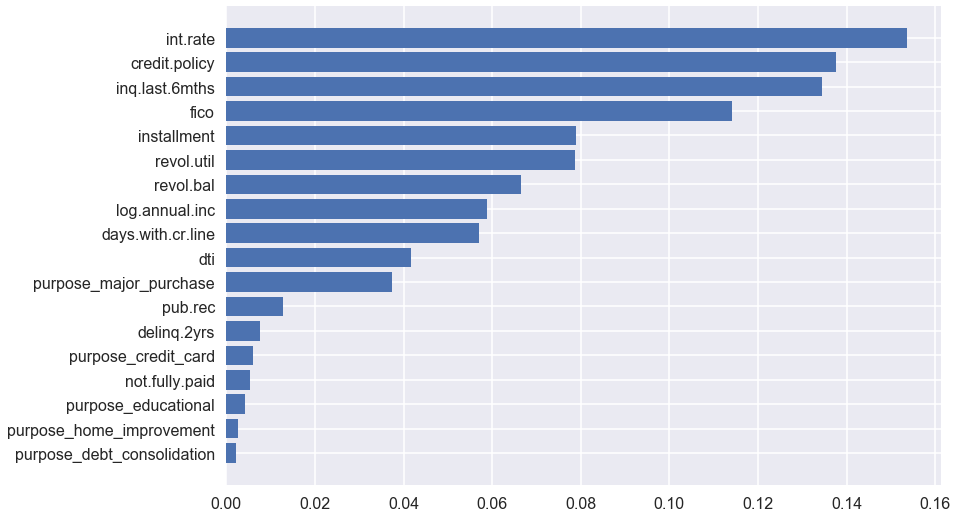

In [148]:
sorted_indices = np.argsort(rf_importances)

y_pos = range(len(rf_importances))
plt.barh(y_pos, rf_importances[sorted_indices], align='center')
plt.yticks(y_pos, final_data.columns[sorted_indices])
plt.show()

- The above graph shows that interest rate of the loan, credit.policy and The borrower's number of inquiries by creditors in the last 6 months are the top three important factors to determine whether or not the borrower paid back their loan in full.

** From the above analysis, it is surprised that while Neural Network, Random Forest and logistic regression have a very similar performance, logistic regression has the highest average AUC score and lowest standard deviation. And in general, the recall for not fully paid class of all four models are not high. This might be due to the fact that we have 8045 data points for people who are fully paid and 1533 who are not fully paid, so we are facing an imbalanced dataset and further improvement could be made by upsampling or downsampling. **